In [34]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime

## Data Import

In [45]:
transactions_im = pd.read_csv('../data/transactions_clean.csv', header=0)

### 2 methods of comparison
The data set includes 

In [46]:
# 1 - fill NaNs with 0s for new stores
transactions = transactions_im.fillna(0)

# 2 - interpolate NaNs for new stores
for i in range(1, 54):
    transactions_im[str(i)] = transactions_im[str(i)].interpolate(method='linear').bfill().ffill()


## Zeros Elbow Curve

In [74]:
transactions = transactions.set_index('date').T

In [75]:
transactions.head()

date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15
1,2111.0,2111.0,1833.0,1863.0,1509.0,520.0,1807.0,1869.0,1910.0,1679.0,...,507.0,1665.0,1766.0,1766.0,1764.0,570.0,1004.0,416.0,1733.0,1693.0
2,2358.0,2358.0,2033.0,2066.0,2062.0,1992.0,1911.0,1856.0,1975.0,1761.0,...,1905.0,1700.0,1688.0,1786.0,1695.0,1698.0,1613.0,1658.0,1788.0,1737.0
3,3487.0,3487.0,3026.0,3188.0,3623.0,3590.0,2996.0,2826.0,2932.0,2649.0,...,3506.0,3046.0,2835.0,2962.0,2841.0,2991.0,3070.0,3075.0,3036.0,2956.0
4,1922.0,1922.0,1551.0,1596.0,1825.0,1891.0,1514.0,1397.0,1533.0,1326.0,...,1453.0,1231.0,1222.0,1325.0,1281.0,1301.0,1304.0,1378.0,1285.0,1283.0
5,1903.0,1903.0,1740.0,1642.0,1643.0,1754.0,1577.0,1504.0,1513.0,1449.0,...,1140.0,1348.0,1183.0,1275.0,1262.0,1183.0,1061.0,1098.0,1225.0,1310.0


In [26]:
# k means determine k
scores = []

for k in range(1,20):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(transactions)
    scores.append(kmeanModel.fit(transactions).score(transactions))

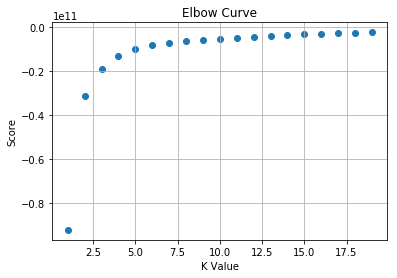

In [27]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores)
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

The curve of the graph is at approximately k=5

## Checking the Clusters

In [28]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(transactions)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Add the cluster assignments

In [30]:
labels = kmeanModel.labels_

In [32]:
transactions['kcluster'] = labels
transactions['kcluster'].value_counts()

2    20
1    14
4     7
3     7
0     6
Name: kcluster, dtype: int64

#### Reshape the data for plotting

In [38]:
transactions0 = transactions[transactions['kcluster']==0].drop('kcluster', axis=1)
transactions1 = transactions[transactions['kcluster']==1].drop('kcluster', axis=1)
transactions2 = transactions[transactions['kcluster']==2].drop('kcluster', axis=1)
transactions3 = transactions[transactions['kcluster']==3].drop('kcluster', axis=1)
transactions4 = transactions[transactions['kcluster']==4].drop('kcluster', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions4 = transactions4.set_index('date')

In [39]:
transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)

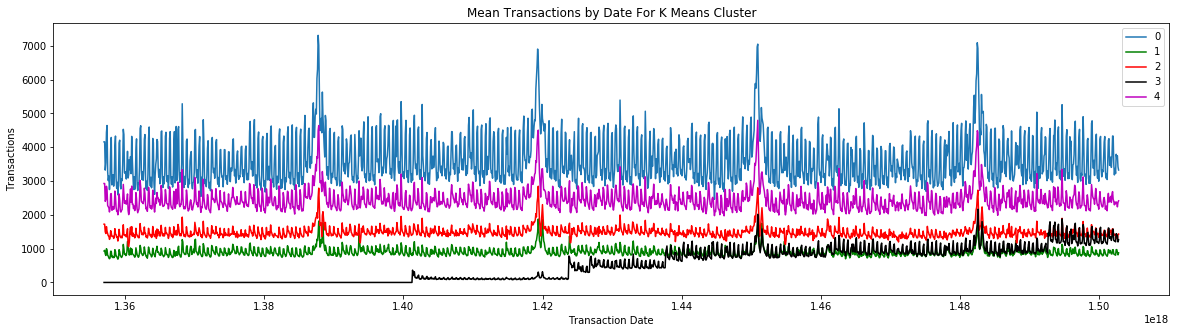

In [40]:
# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='g', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='k', label='3')
plt.plot(transactions4.index.values, transactions4['mean'], color='m', label='4')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

## Interpolated K Means Elbow Curve

In [47]:
transactions_im = transactions_im.set_index('date').T

In [54]:
# k means determine k
scores2 = []

for k in range(1,20):
    kmeanModel2 = KMeans(n_clusters=k)
    kmeanModel2.fit(transactions_im)
    scores2.append(kmeanModel2.fit(transactions_im).score(transactions_im))

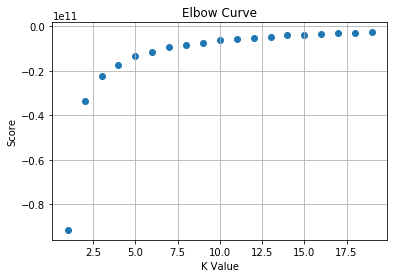

In [55]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores2)
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

In [60]:
kmeanModel2 = KMeans(n_clusters=5)
kmeanModel2.fit(transactions_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
labels = kmeanModel2.labels_
transactions_im['kcluster'] = labels
transactions_im['kcluster'].value_counts()

1    22
4    14
2     7
0     7
3     4
Name: kcluster, dtype: int64

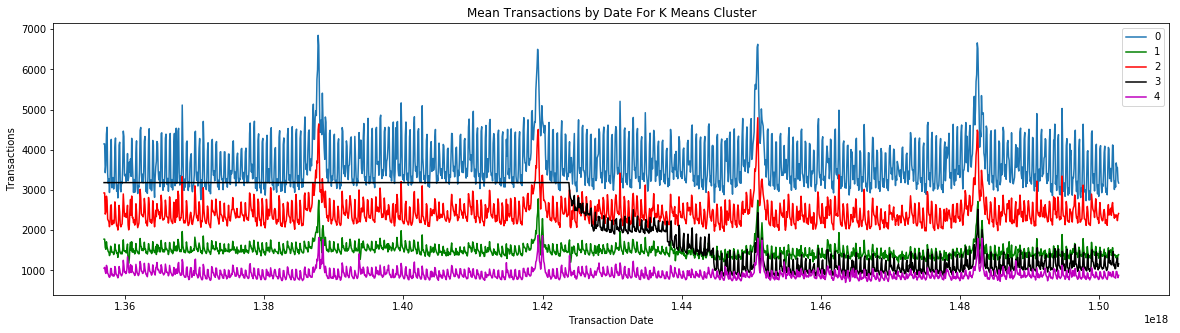

In [62]:
transactions0 = transactions_im[transactions_im['kcluster']==0].drop('kcluster', axis=1)
transactions1 = transactions_im[transactions_im['kcluster']==1].drop('kcluster', axis=1)
transactions2 = transactions_im[transactions_im['kcluster']==2].drop('kcluster', axis=1)
transactions3 = transactions_im[transactions_im['kcluster']==3].drop('kcluster', axis=1)
transactions4 = transactions_im[transactions_im['kcluster']==4].drop('kcluster', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions4 = transactions4.set_index('date')

transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)

# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='g', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='k', label='3')
plt.plot(transactions4.index.values, transactions4['mean'], color='m', label='4')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

## Compare the two methods

In [118]:
labels1 = kmeanModel.labels_
labels2 = kmeanModel2.labels_

compare = pd.DataFrame({'store': transactions.index.values, 'labels1': labels1, 'labels2': labels2})

pd.crosstab(compare['labels1'],compare['labels2'])

labels2,0,1,2,3,4
labels1,,,,,
0,6,0,0,0,0
1,0,0,0,0,14
2,0,20,0,0,0
3,1,2,0,4,0
4,0,0,7,0,0


In [107]:
c = compare[compare['labels1']==3]
c

,labels1,labels2,store
19,3,3,20
20,3,3,21
21,3,3,22
28,3,3,29
41,3,1,42
51,3,0,52
52,3,1,53


In [109]:
stores = ['20','21','22','29','42','52','53']
t = transactions.loc[stores,:]
t

date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2087.0,1525.0,1543.0,1416.0,1520.0,1751.0,1664.0,1834.0,1522.0,1516.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1541.0,1052.0,1112.0,965.0,882.0,1165.0,1119.0,1403.0,1045.0,1059.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,703.0,724.0,730.0,734.0,730.0,701.0,888.0,701.0,794.0,766.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1549.0,1145.0,1218.0,1051.0,1040.0,1199.0,1196.0,1298.0,1031.0,1302.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1146.0,1086.0,1026.0,1063.0,1083.0,1055.0,1019.0,932.0,1027.0,995.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2711.0,2152.0,1997.0,2300.0,2165.0,2957.0,2804.0,2433.0,2074.0,2255.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1308.0,1009.0,977.0,1084.0,994.0,1272.0,1212.0,1164.0,895.0,932.0


In [114]:
storeslist = pd.read_csv('../data/stores.csv', header=0)
storeslist['store'] = storeslist['store_nbr'].map(lambda a: int(a))
storeslist.drop('store_nbr', axis=1, inplace=True)

In [119]:
compare['store'] = compare['store'].map(lambda a: int(a))
compare = compare.merge(storeslist, on='store', how='left')

In [120]:
compare

,labels1,labels2,store,city,state,type,cluster
0,2,1,1,Quito,Pichincha,D,13
1,2,1,2,Quito,Pichincha,D,13
2,0,0,3,Quito,Pichincha,D,8
3,2,1,4,Quito,Pichincha,D,9
4,2,1,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,2,1,6,Quito,Pichincha,D,13
6,2,1,7,Quito,Pichincha,D,8
7,4,2,8,Quito,Pichincha,D,8
8,4,2,9,Quito,Pichincha,B,6
9,1,4,10,Quito,Pichincha,C,15


In [122]:
pd.crosstab(compare['labels1'],compare['type'])

type,A,B,C,D,E
labels1,,,,,
0,5,0,0,1,0
1,0,0,8,4,2
2,1,3,6,9,1
3,1,2,1,2,1
4,2,3,0,2,0


In [123]:
pd.crosstab(compare['labels2'],compare['type'])

type,A,B,C,D,E
labels2,,,,,
0,6,0,0,1,0
1,1,3,6,11,1
2,2,3,0,2,0
3,0,2,1,0,1
4,0,0,8,4,2


In [127]:
pd.crosstab(compare['labels1'],compare['cluster'])

cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
labels1,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,1,0,0,1,0,0,3,0,0,0
1,1,0,6,1,0,0,0,0,1,3,0,0,0,0,2,0,0
2,1,1,1,2,0,1,1,1,1,2,0,1,3,0,3,1,1
3,0,1,0,0,0,2,1,0,0,1,1,0,1,0,0,0,0
4,1,0,0,0,0,3,0,1,0,0,1,0,0,1,0,0,0


In [125]:
compare.loc[compare['store'].isin(stores),:]

,labels1,labels2,store,city,state,type,cluster
19,3,3,20,Quito,Pichincha,B,6
20,3,3,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6
21,3,3,22,Puyo,Pastaza,C,7
28,3,3,29,Guayaquil,Guayas,E,10
41,3,1,42,Cuenca,Azuay,D,2
51,3,0,52,Manta,Manabi,A,11
52,3,1,53,Manta,Manabi,D,13


### Conclusion
We will use the first set of clusters and compare these to manual clusters based on store type.

In [128]:
import pickle
from sklearn.externals import joblib

with open('/Users/emily-air13/Desktop/code/FavoritaGrocery/Part3-ClusteringandModels/transactionkmeans.pkl', 'wb') as f:
    joblib.dump(kmeanModel, f)
